<a href="https://colab.research.google.com/github/nimishac28/DataAnalytics/blob/main/House_prices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score,  RepeatedKFold, GridSearchCV
from sklearn.linear_model import LinearRegression, Lasso, Ridge, BayesianRidge, ElasticNet
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm

In [2]:
import numpy as np
import pandas as pd

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
sns.set_style("darkgrid")
%matplotlib inline

In [11]:
path='/content/Housing_Macroeconomic_Factors_US (2).csv'
data= pd.read_csv(path, parse_dates=['Date'])

# New Section

In [12]:
data

,Date,house_price_index,population,house_supply,gdp,mortgage_rate,employment_rate,permit_new,ppi_res,m3,cci,delinquency_rate,hcai
0,1987-01-01,63.965,241857,6.0,99.902813,9.2040,70.163085,1690.0,100.000,2.7439,100.46240,NaN,NaN
1,1987-02-01,64.424,242005,6.2,99.875864,9.0825,70.289205,1689.0,100.400,2.7475,100.49450,NaN,NaN
2,1987-03-01,64.735,242166,6.0,99.869734,9.0350,70.321678,1704.0,100.700,2.7537,100.57200,NaN,NaN
3,1987-04-01,65.132,242338,6.0,99.882087,9.8325,70.499062,1601.0,101.100,2.7677,100.65680,NaN,NaN
4,1987-05-01,65.565,242516,6.7,99.910371,10.5960,70.808308,1500.0,101.300,2.7729,100.69190,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
420,2022-01-01,284.767,332684,5.7,100.091744,3.4450,70.748899,1841.0,294.807,21.6593,97.49467,2.13,NaN
421,2022-02-01,290.371,332750,6.0,100.034014,3.7625,70.890307,1857.0,303.546,21.7497,97.18996,2.13,NaN
422,2022-03-01,296.496,332812,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
423,2022-04-01,301.704,332863,8.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
data.shape

(425, 13)

In [15]:
data.describe

<bound method NDFrame.describe of           Date  house_price_index  population  house_supply         gdp  \
0   1987-01-01             63.965      241857           6.0   99.902813   
1   1987-02-01             64.424      242005           6.2   99.875864   
2   1987-03-01             64.735      242166           6.0   99.869734   
3   1987-04-01             65.132      242338           6.0   99.882087   
4   1987-05-01             65.565      242516           6.7   99.910371   
..         ...                ...         ...           ...         ...   
420 2022-01-01            284.767      332684           5.7  100.091744   
421 2022-02-01            290.371      332750           6.0  100.034014   
422 2022-03-01            296.496      332812           7.0         NaN   
423 2022-04-01            301.704      332863           8.6         NaN   
424 2022-05-01            304.831      332928           8.4         NaN   

     mortgage_rate  employment_rate  permit_new  ppi_res       m3

In [16]:
data.info

<bound method DataFrame.info of           Date  house_price_index  population  house_supply         gdp  \
0   1987-01-01             63.965      241857           6.0   99.902813   
1   1987-02-01             64.424      242005           6.2   99.875864   
2   1987-03-01             64.735      242166           6.0   99.869734   
3   1987-04-01             65.132      242338           6.0   99.882087   
4   1987-05-01             65.565      242516           6.7   99.910371   
..         ...                ...         ...           ...         ...   
420 2022-01-01            284.767      332684           5.7  100.091744   
421 2022-02-01            290.371      332750           6.0  100.034014   
422 2022-03-01            296.496      332812           7.0         NaN   
423 2022-04-01            301.704      332863           8.6         NaN   
424 2022-05-01            304.831      332928           8.4         NaN   

     mortgage_rate  employment_rate  permit_new  ppi_res       m3  

In [17]:
data = data.dropna().set_index('Date')
data

,house_price_index,population,house_supply,gdp,mortgage_rate,employment_rate,permit_new,ppi_res,m3,cci,delinquency_rate,hcai
Date,,,,,,,,,,,,
1998-01-01,87.616,274732,4.0,99.994570,6.9940,73.705376,1555.0,137.300,4.0562,102.53850,2.16,10.024
1998-02-01,88.004,274943,3.9,99.980549,7.0425,73.776106,1647.0,137.500,4.0889,102.71290,2.16,10.024
1998-03-01,88.443,275175,4.1,99.975298,7.1275,73.798698,1605.0,137.500,4.1143,102.72100,2.16,10.024
1998-04-01,88.879,275434,4.0,99.984454,7.1400,73.869665,1547.0,137.900,4.1402,102.69810,2.03,9.668
1998-05-01,89.365,275700,3.9,100.013988,7.1440,73.880942,1554.0,137.600,4.1644,102.59230,2.03,9.668
...,...,...,...,...,...,...,...,...,...,...,...,...
2021-05-01,254.556,332008,5.4,99.150900,2.9625,68.980558,1691.0,268.100,20.4176,99.82759,2.41,2.721
2021-06-01,259.249,332092,5.8,99.317590,2.9750,69.119038,1661.0,274.800,20.4591,99.60782,2.41,2.721
2021-07-01,263.349,332192,6.0,99.493405,2.8680,69.664968,1655.0,274.524,20.6200,99.11760,2.30,2.821


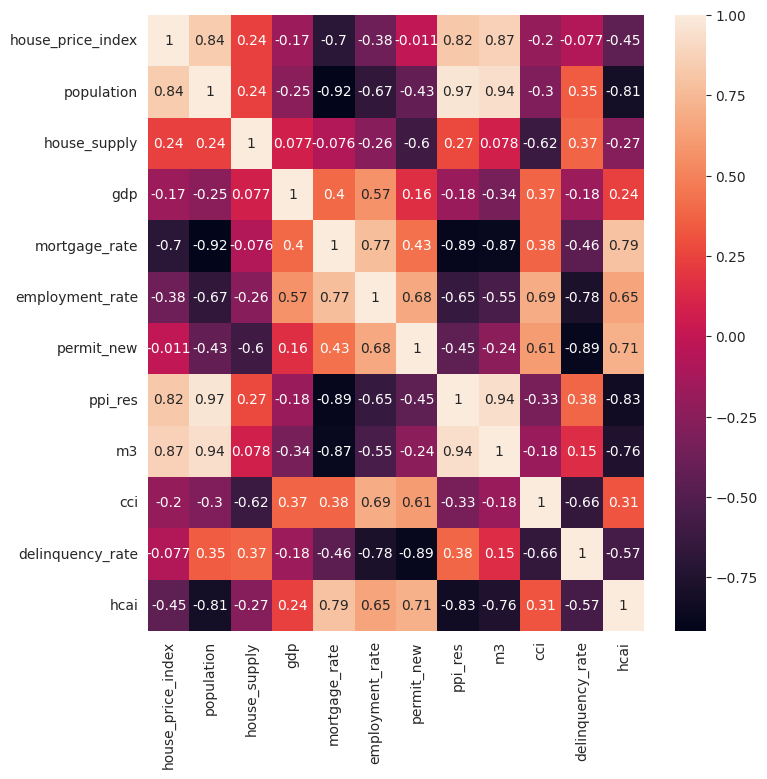

In [19]:
corrmat=data.corr()
f, ax = plt.subplots(figsize=(8, 8))
sns.heatmap(corrmat, annot= True)
plt.show()


Observations:
1.  HPI (house_price_index) has a very strong positive
 linear relationship with Population, ppi_res & m3
2. It also has a strong negative linear relationship with mortgage_rate.
3. Population has even stronger positive relationship with ppi_res and m3, while a strong negative relationship with mortgage_rate.





In [21]:
macro_df = data.copy().reset_index()
macro_df = macro_df.drop(columns=['Date'])

In [22]:
scaler = StandardScaler()
n_macro=pd.DataFrame(scaler.fit_transform(macro_df), columns=macro_df.columns, index=macro_df.index)
n_macro.head(4)

,house_price_index,population,house_supply,gdp,mortgage_rate,employment_rate,permit_new,ppi_res,m3,cci,delinquency_rate,hcai
0,-1.844168,-1.844547,-0.858095,0.044407,1.245838,1.396556,0.425385,-1.431824,-1.304418,1.563211,-0.717340,0.152272
1,-1.834121,-1.832474,-0.911504,0.033392,1.279529,1.424986,0.627564,-1.425959,-1.296470,1.674163,-0.717340,0.152272
2,-1.822753,-1.819199,-0.804687,0.029266,1.338576,1.434066,0.535265,-1.425959,-1.290296,1.679316,-0.717340,0.152272
3,-1.811463,-1.804380,-0.858095,0.036459,1.347259,1.462591,0.407804,-1.414229,-1.284000,1.664747,-0.758125,0.100253


In [23]:
X_train, X_test, y_train, y_test = train_test_split(n_macro.drop(columns="house_price_index", axis=1), n_macro["house_price_index"], test_size= 0.30, random_state=42)

In [25]:
# defining the model
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
model1 = Lasso(alpha=1.0)
scores1 = cross_val_score(model1, X_train, y_train, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
scores1 = np.absolute(scores1)

print('Mean MAE: %.3f (%.3f)'%  (np.mean(scores1), np.std(scores1)))

Mean MAE: 0.792 (0.128)


In [26]:
model2 = Ridge(alpha=1.0)
scores2 = cross_val_score(model2, X_train, y_train, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
scores2 = np.absolute(scores2)
print('Mean MAE: %.3f (%.3f)' % (np.mean(scores2), np.std(scores2)))

Mean MAE: 0.090 (0.015)


In [27]:
model3 = BayesianRidge()
scores3 = cross_val_score(model3, X_train, y_train, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
scores3 = np.absolute(scores3)
print('Mean MAE: %.3f (%.3f)' % (np.mean(scores3), np.std(scores3)))

Mean MAE: 0.090 (0.015)


In [28]:
model4 = LinearRegression()
scores4 = cross_val_score(model4, X_train, y_train, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
scores4 = np.absolute(scores4)
print('Mean MAE: %.3f (%.3f)' % (np.mean(scores4), np.std(scores4)))

Mean MAE: 0.090 (0.015)


Ridge, BayesianRidge & Linear Regression had the best score. Chosing BayesianRidge for further optimization

In [29]:
clf = GridSearchCV(BayesianRidge(),{
    'alpha_1':list(range(0,10,1)),
    'alpha_2':list(range(0,10,1)),
    'lambda_1':list(range(0,10,1)),
    'lambda_2':list(range(0,10,1))

}, cv=5, return_train_score=False )

clf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=BayesianRidge(),
             param_grid={'alpha_1': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
                         'alpha_2': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
                         'lambda_1': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
                         'lambda_2': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]})

In [30]:
param_df = pd.DataFrame(clf.cv_results_)
param_df.head(4)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha_1,param_alpha_2,param_lambda_1,param_lambda_2,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.004150,0.001800,0.001991,0.000405,0,0,0,0,"{'alpha_1': 0, 'alpha_2': 0, 'lambda_1': 0, 'l...",0.968588,0.983355,0.985354,0.988191,0.989290,0.982955,0.007482,3964
1,0.004740,0.000324,0.002774,0.000088,0,0,0,1,"{'alpha_1': 0, 'alpha_2': 0, 'lambda_1': 0, 'l...",0.968525,0.983214,0.985276,0.988049,0.989311,0.982875,0.007483,8204
2,0.004773,0.000628,0.002727,0.000255,0,0,0,2,"{'alpha_1': 0, 'alpha_2': 0, 'lambda_1': 0, 'l...",0.968513,0.983187,0.985261,0.988022,0.989315,0.982860,0.007483,9094
3,0.004629,0.000179,0.002881,0.000241,0,0,0,3,"{'alpha_1': 0, 'alpha_2': 0, 'lambda_1': 0, 'l...",0.968509,0.983175,0.985255,0.988011,0.989316,0.982853,0.007483,9453


In [31]:
max_test_score = np.max(param_df["mean_test_score"])
print(max_test_score)

0.9832915283596397


In [32]:
param_df[param_df['mean_test_score']==max_test_score]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha_1,param_alpha_2,param_lambda_1,param_lambda_2,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
6900,0.002416,0.000145,0.00162,0.000237,6,9,0,0,"{'alpha_1': 6, 'alpha_2': 9, 'lambda_1': 0, 'l...",0.969116,0.983871,0.985791,0.988693,0.988986,0.983292,0.007337,1


In [33]:
print('''Hyper Parameters are:
            alpha_1: {}
            alpha_2: {}

            lambda_1: {}
            lambda_2: {}'''.format(param_df["param_alpha_1"][806], param_df["param_alpha_2"][806], param_df["param_lambda_1"][806], param_df["param_lambda_2"][806]))

Hyper Parameters are:
            alpha_1: 0
            alpha_2: 8
            
            lambda_1: 0
            lambda_2: 6


In [34]:
model_br= BayesianRidge(alpha_1=0, alpha_2=1, lambda_1=9, lambda_2=9)
fit_data = model_br.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but BayesianRidge was fitted without feature names
  warnings.warn(


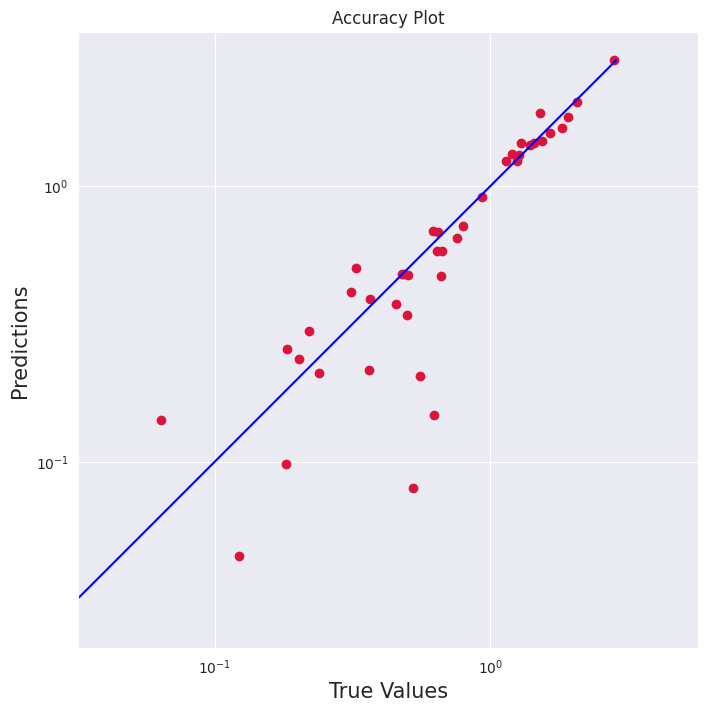

In [45]:
prediction = fit_data.predict(X_test)

# Plotting both the curves simultaneously
plt.figure(figsize=(8,8))
plt.scatter(y_test, prediction, c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(prediction), max(y_test))
p2 = min(min(prediction), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.title("Accuracy Plot")
plt.axis('equal')
plt.show()

In [36]:
from mlxtend.evaluate import bias_variance_decomp
X_tr = X_train.to_numpy(dtype ='float32')
X_tst = X_test.to_numpy(dtype ='float32')
y_tr = y_train.to_numpy(dtype ='float32')
y_tst = y_test.to_numpy(dtype ='float32')

mse, bias, variance = bias_variance_decomp(model_br, X_tr, y_tr, X_tst, y_tst,
                                           loss='mse', num_rounds=200, random_seed=123)
print("Average Bias : ", bias)
print("Average Variance : ", variance)

Average Bias :  0.02099221189807502
Average Variance :  0.0010116923873970248


In [37]:
rmse=np.sqrt(mean_squared_error(y_test, prediction))
print('RMSE: ', rmse)
r2 = r2_score(y_test, prediction)
print('R squared: ', r2)

RMSE:  0.14511559470217775
R squared:  0.979852626626881
